In [96]:
%matplotlib inline

import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
from reference import get_file_names

In [97]:
# get the col reference table
df_ref = pd.read_csv('./vidas_data/cross_ref_cols_tabs.csv')
# df_ref.head()

In [98]:
# get the data frame giving the list of IDEHRs who have passed
get_file_names(['IDEHR', 'EHRType', 'IDDecesso'], df_ref)

['wH_DirectTable_C_Decesso', 'wH_DirectTable_Decesso']

In [99]:
# get the data frame giving the list of IDEHRs with the start date of hospitalization
get_file_names(['IDEHR', 'EHRType', 'TimeStamp_Insert'], df_ref)

['wH_DirectTable_C_COLLOQUIO_MED',
 'wH_DirectTable_C_ANAMNESI_INF',
 'wH_DirectTable_C_Scala_Dolore_PAINAD',
 'wH_DirectTable_VISITA_OSS_VIDAS',
 'wH_DirectTable_C_Scala_di_Barthel',
 'wH_Stats_CC_EHR_OpenLog',
 'wH_DirectTable_R_SCALE_PPI',
 'wH_DirectTable_CAM',
 'wH_DirectTable_DOLORE_OSS_VIDAS',
 'wH_DirectTable_C_Studio_NEVI_Criteri_',
 'wH_DirectTable_ASSOC_ON_FUNEBRI',
 'wH_DirectTable_CR_RISCHIO_LESIONI',
 'wH_DirectTable_COLLOQUIO_OSS',
 'wH_DirectTable_C_PAI_VIDAS',
 'wH_DirectTable__S_VMD_FLUSSI_',
 'wH_DirectTable_DOLORE_MED_e_INF_VIDAS',
 'wH_DirectTable_CR_SCALE_PPI',
 'wH_DirectTable_C_GESTIONE_AUSILI',
 'wH_DirectTable_PI_DOM',
 'wH_DirectTable_C_DOLORE_OSS_VIDAS',
 'wH_DirectTable_C_TERAPIE_OUTPAT_VIDAS',
 'wH_DirectTable_Scala_Dolore_PAINAD',
 'wH_DirectTable_TERAPIE_OUTPAT_VIDAS',
 'wH_DirectTable_C_CAM',
 'wH_DirectTable_DAT',
 'wH_DirectTable_C_VISITA_PSI_VIDAS',
 'wH_DirectTable_C_LESIONI_MED_e_INF_VI',
 'wH_DirectTable_Referto_Offline',
 'wH_DirectTable_GESTIONE

In [100]:
# get the data frame giving the list of IDEHRs with the diagnosis
get_file_names(['IDEHR', 'EHRType', 'IDDIAGNOSI_ICD'], df_ref)

['wH_DirectTable_DIAGNOSI_ICD', 'wH_DirectTable_C_DIAGNOSI_ICD']

In [101]:
# data frame with deathID
df_death = pd.read_csv('./vidas_data/wH_DirectTable_Decesso.csv', parse_dates=['Data'])
df_death = df_death[['IDEHR', 'Data', 'EHRType']].drop_duplicates(subset=['IDEHR'], keep='first')
print(df_death.shape)
df_death.head()

(5935, 3)


,IDEHR,Data,EHRType
0,4,2015-01-09 16:15:00,EHR
1,1022,2015-01-11 00:15:00,EHR
2,16,2015-01-15 01:45:00,EHR
3,1025,2015-01-15 06:44:00,EHR
4,6,2015-01-20 14:50:00,EHR


In [102]:
# check NaNs
df_death.isna().sum()

IDEHR       0
Data       54
EHRType     0
dtype: int64

In [103]:
# data frame with start of hospitalization
df_soh = pd.read_csv('./vidas_data/wH_DigitalSign_DigSigDoc.csv', parse_dates=['TimeStamp_Insert'])
print(df_soh.shape)
df_soh = df_soh[['IDEHR', 'EHRType', 'TimeStamp_Insert']].drop_duplicates(subset=['IDEHR'], keep='first')
print(df_soh.shape)
df_soh.head()

C:\Users\prate\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (36,37) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(2157301, 50)
(18903, 3)


,IDEHR,EHRType,TimeStamp_Insert
0,1,AMB,2014-12-30 10:52:57.653
6,3,AMB,2014-12-30 11:12:01.570
8,7,AMB,2014-12-30 11:18:06.063
10,10,AMB,2014-12-30 11:22:52.020
14,13,AMB,2014-12-30 11:27:28.030


In [104]:
# check NaNs
df_soh.isna().sum()

IDEHR               0
EHRType             0
TimeStamp_Insert    0
dtype: int64

In [105]:
# data frame with diagnosis
df_diag = pd.read_csv('./vidas_data/wH_DirectTable_DIAGNOSI_ICD.csv')
df_diag = df_diag[['IDEHR', 'I_ICD', 'EHRType']].drop_duplicates(subset=['IDEHR'], keep='first')
print(df_diag.shape)
df_diag.head()

(8224, 3)


C:\Users\prate\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (23,24,42,43,44,62,63,64) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,IDEHR,I_ICD,EHRType
0,3339,1629 - Tumori maligni del bronco o polmone - ...,AMB
1,1402,NaN,AMB
2,3170,1749 - Tumori maligni della mammella (della do...,AMB
3,2885,1428 - Tumori maligni di altre ghiandole saliv...,AMB
4,3017,1749 - Tumori maligni della mammella (della do...,AMB


In [106]:
# check NaNs
df_diag.isna().sum()

IDEHR       0
I_ICD      47
EHRType     0
dtype: int64

In [107]:
df_diag = df_diag.dropna()
print(df_diag.shape)
df_diag.isna().sum()

(8177, 3)


IDEHR      0
I_ICD      0
EHRType    0
dtype: int64

In [108]:
# df_diag.diagnosi.value_counts()

In [109]:
# do the merge
from functools import reduce
dfs = [df_death, df_soh, df_diag]
df_referral = reduce(lambda left, right: pd.merge(left, right, on=['IDEHR', 'EHRType']), dfs)

In [110]:
df_referral

,IDEHR,Data,EHRType,TimeStamp_Insert,I_ICD
0,3263,2015-10-02 07:50:00,AMB,2015-09-21 10:00:18.743,1550 - Tumori maligni primitivi del fegato#2048
1,2904,NaT,AMB,2015-09-04 14:53:01.400,1550 - Tumori maligni primitivi del fegato#2048
2,3339,NaT,AMB,2015-09-23 15:11:20.817,1629 - Tumori maligni del bronco o polmone - ...
3,3394,2015-10-06 03:25:00,AMB,2015-09-25 18:17:56.940,1629 - Tumori maligni del bronco o polmone - ...
4,3417,2015-10-05 15:00:00,AMB,2015-09-28 17:26:59.413,1739 - Altri tumori maligni della cute - sede...
...,...,...,...,...,...
4511,5281,2020-07-23 09:55:00,EHR,2020-07-17 12:37:32.397,1500 - Tumori maligni dell'esofago cervicale#2...
4512,27907,2020-07-23 11:00:00,AMB,2020-04-23 14:32:41.760,"1629 - Tumori maligni del bronco o polmone, no..."
4513,28540,2020-07-23 01:45:22,AMB,2020-05-27 08:46:34.090,1536 - Tumori maligni del colon ascendente#2039
4514,29440,2020-07-23 15:36:43,AMB,2020-07-21 09:21:33.733,"1629 - Tumori maligni del bronco o polmone, no..."


In [111]:
# get the survival time (in days) for each patient
df_referral['survival_time_days'] = pd.to_timedelta(df_referral['Data'] - df_referral['TimeStamp_Insert']).dt.days
df_referral.head()

,IDEHR,Data,EHRType,TimeStamp_Insert,I_ICD,survival_time_days
0,3263,2015-10-02 07:50:00,AMB,2015-09-21 10:00:18.743,1550 - Tumori maligni primitivi del fegato#2048,10.0
1,2904,NaT,AMB,2015-09-04 14:53:01.400,1550 - Tumori maligni primitivi del fegato#2048,NaN
2,3339,NaT,AMB,2015-09-23 15:11:20.817,1629 - Tumori maligni del bronco o polmone - ...,NaN
3,3394,2015-10-06 03:25:00,AMB,2015-09-25 18:17:56.940,1629 - Tumori maligni del bronco o polmone - ...,10.0
4,3417,2015-10-05 15:00:00,AMB,2015-09-28 17:26:59.413,1739 - Altri tumori maligni della cute - sede...,6.0


In [112]:
print(df_referral.shape)
df_referral.survival_time_days.value_counts()

(4516, 6)


5.0      171
2.0      160
3.0      160
4.0      153
1.0      149
        ... 
307.0      1
353.0      1
571.0      1
450.0      1
782.0      1
Name: survival_time_days, Length: 306, dtype: int64

In [113]:
print(df_referral.isna().sum())
df_referral = df_referral.dropna()

IDEHR                  0
Data                  52
EHRType                0
TimeStamp_Insert       0
I_ICD                  0
survival_time_days    52
dtype: int64


In [114]:
# translate the diagnosis to English
# from googletrans import Translator
# df_referral['Diagnosis'] = df_referral.Diagnosi.str.findall('(.+)#').to_frame()
# df_referral['Diagnosis'] = df_referral['Diagnosis'].apply(lambda x: x if isinstance(x, float) else x[0])

# translator = Translator()
# df_referral['Diagnosi'] = df_referral['Diagnosis'].apply(translator.translate, src='it', dest='en').apply(getattr, args=('text',))
# df_referral = df_referral.drop(columns = ['Diagnosis'])
# df_referral.head()

In [115]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_width()
        ax.annotate('{}'.format(height),
                    xy=(height, rect.get_y()),
                    xytext=(30, 0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

In [116]:
with pd.option_context("display.max_rows", 1000):
    print(df_referral.survival_time_days.value_counts())

 5.0       171
 2.0       160
 3.0       160
 4.0       153
 1.0       149
 9.0       125
 6.0       124
 8.0       118
 7.0       118
 10.0      108
 11.0      104
 15.0      101
 12.0       99
 13.0       88
 14.0       85
 16.0       78
 17.0       76
 19.0       73
 18.0       73
 0.0        73
 22.0       72
 24.0       67
 23.0       66
 26.0       62
 21.0       57
 20.0       57
 28.0       55
 25.0       52
 29.0       48
 27.0       45
 31.0       44
 30.0       44
 37.0       41
 35.0       38
 46.0       37
 38.0       37
 36.0       35
 32.0       35
 34.0       34
 40.0       32
 45.0       32
 33.0       31
 44.0       30
 47.0       29
 39.0       29
 42.0       27
 41.0       26
 50.0       26
 57.0       26
 43.0       26
 48.0       20
 55.0       19
 49.0       19
 56.0       19
 61.0       18
 62.0       18
 51.0       18
 79.0       17
 59.0       17
 70.0       16
 58.0       16
 52.0       15
 53.0       15
 64.0       14
 63.0       14
 60.0       13
 66.0     

In [117]:
# print('Mean Survival (using index): ', np.mean(df_referral.survival_time_days.value_counts())) # this just gives the mean of the days (not counting the number of times that day occurs)
# print('Survival Stddev (using index): ', np.std(df_referral.survival_time_days.value_counts().index, ddof=0))
print('Mean Survival: ', np.mean(df_referral.survival_time_days))
print('Survival Stddev: ', np.std(df_referral.survival_time_days, ddof=0))

Mean Survival:  41.92383512544803
Survival Stddev:  72.97699056769135


<Figure size 1440x720 with 0 Axes>

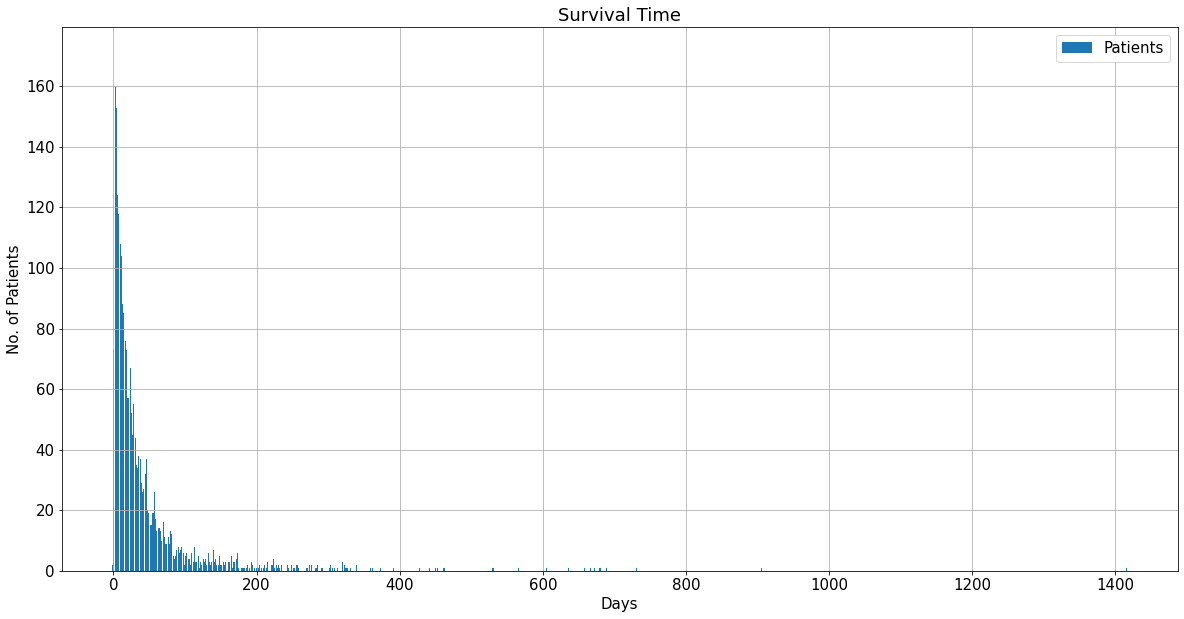

In [118]:
# get the survival time histogram for all patients
plt.rcParams['figure.figsize'] = [20, 10]
matplotlib.rcParams.update({'font.size': 15})
plt.figure()
labels = df_referral['survival_time_days'].value_counts().index
survival = df_referral['survival_time_days'].value_counts(normalize=False)
fig, ax = plt.subplots()
bar1 = ax.bar(labels, survival, label='Patients')
ax.set_xlabel('Days')
ax.set_ylabel('No. of Patients')
ax.set_title('Survival Time')
ax.legend()
plt.grid()
plt.savefig("./graphs/referral analysis/survival_time.png")
plt.show()

In [119]:
# df_referral.I_ICD.unique()

In [120]:
# clean up the diagnosis column
from googletrans import Translator
df_referral['Diagnosis'] = df_referral.I_ICD.str.findall('- (.+)#').to_frame()
df_referral['Diagnosis'] = df_referral['Diagnosis'].apply(lambda x: x if isinstance(x, float) else x[0]) 
df_referral['Diag_Ref'] = df_referral.I_ICD.str.findall('(\d+) -').to_frame()
df_referral['Diag_Ref'] = df_referral['Diag_Ref'].apply(lambda x: x if isinstance(x, float) else int(x[0]))

<ipython-input-120-4a88bdb045d3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_referral['Diagnosis'] = df_referral.I_ICD.str.findall('- (.+)#').to_frame()
<ipython-input-120-4a88bdb045d3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_referral['Diagnosis'] = df_referral['Diagnosis'].apply(lambda x: x if isinstance(x, float) else x[0])
<ipython-input-120-4a88bdb045d3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [121]:
df_referral.head()

,IDEHR,Data,EHRType,TimeStamp_Insert,I_ICD,survival_time_days,Diagnosis,Diag_Ref
0,3263,2015-10-02 07:50:00,AMB,2015-09-21 10:00:18.743,1550 - Tumori maligni primitivi del fegato#2048,10.0,Tumori maligni primitivi del fegato,1550
3,3394,2015-10-06 03:25:00,AMB,2015-09-25 18:17:56.940,1629 - Tumori maligni del bronco o polmone - ...,10.0,Tumori maligni del bronco o polmone - non spe...,1629
4,3417,2015-10-05 15:00:00,AMB,2015-09-28 17:26:59.413,1739 - Altri tumori maligni della cute - sede...,6.0,Altri tumori maligni della cute - sede non sp...,1739
5,2977,2015-10-06 06:00:00,AMB,2015-09-08 11:26:31.850,001 - Cure Palliative#2005,27.0,Cure Palliative,1
6,2826,2015-10-07 18:30:00,AMB,2015-09-02 12:44:23.420,1579 - Tumori maligni del pancreas - parte no...,35.0,Tumori maligni del pancreas - parte non speci...,1579


In [122]:
# ref_diag = df_referral[['Diagnosis', 'Diag_Ref']].drop_duplicates()
# ref_diag['Diagnosis'] = ref_diag['Diagnosis'].apply(translator.translate, src='it', dest='en').apply(getattr, args=('text',))
# print(len(ref_diag.Diagnosis.unique()), len(ref_diag.Diag_Ref.unique()))
# ref_diag.head()

478 429


,Diagnosis,Diag_Ref
0,Primary malignant tumors of the liver,1550
3,Malignant tumors of the bronchus or lung - uns...,1629
4,Other skin malignancies - unspecified site,1739
5,Palliative Care,1
6,Malignant tumors of the pancreas - unspecified...,1579


In [123]:
# save as csv file for grouping reference
# ref_diag.to_csv('./vidas_data/diagnosis_reference.csv')

In [124]:
# group together similar diag 
liver_biliary = [1550, 1977, 1560, 1569, 1977, 1568, 1561, 1552, 1551]
lung = [1629, 1625, 1624, 1623, 1970, 1628, 1630, 1639, 162, 1638, 2312, 1631, 1011, 1649, 1972, 1622]
skin = [1739, 1728, 1738, 172, 1723, 1737, 1733, 1729, 2324, 1735, 1760]
other = [1, 667, 20340, 436, 51883, 1533, 4289, 1580, 2, 4379, 1562, 40391, 1589, 1639, 7054, 20300, 1534, 5193, 1976, 5859, 4281, 5119, 4280, 1990, 33520, 1928, 1718, 20290, 5716, 667, 7895, 33119, 20301, 4149, 20500, 20530, 2059, 199, 23875, 2040, 5715, 2900, 200, 33182, 4912, 202, 591, 2904, 29043, 586, 425, 2900, 6393, 49122, 1958, 2399, 34839, 5761, 7242, 99, 2308, 71500, 1961, 10, 1872, 1719, 2564, 1640, 51883, 4380, 1768, 2902, 2399, 29021, 4254, 3321, 2012, 1515, 3382, 51881, 515, 29040, 49121, 51884, 1960, 34591, 4011, 1079, 4371, 1452, 29020, 23875, 4918, 4409, 7687, 1009, 2859, 5849, 73300, 768, 109, 2800, 2941, 600, 1303, 7994, 5712, 4299, 3485, 2019, 1052, 29411, 4019, 7854, 5118, 3320, 4169, 4414, 2252, 3352, 431, 28521, 28989, 4150, 7051, 3438, 1991, 4321, 1709, 578, 56089, 7824, 20380, 2002, 20020, 43811, 340, 73301, 19889, 49120, 20121, 2899, 261, 2903, 2001, 3312, 4160, 57140, 20002, 42, 5900, 9985, 42731, 41511, 430, 99591, 1702, 3449, 40493, 20000, 4168, 34830, 3314, 34590, 463, 135, 20191, 1962, 33524, 29041, 2089, 4941, 28529, 5609]
pancreas = [1579, 1578, 1570, 1571, 1572, 157, 1573]
head_neck = [1619, 1488, 1489, 1467, 1450, 1471, 1468, 1409, 1431, 1412, 1460, 1710, 1418, 1420, 1724, 1469, 1419, 1439, 1479, 1421, 1601, 1721, 1441, 1603, 1618, 1610, 1459, 1499, 1411, 1950, 1490, 1459, 1478, 1438]
stomach_esophagus = [1519, 1513, 1518, 1509, 1504, 1514, 1502, 1501, 150, 1004, 1520,  1510, 1508, 1512, 1503, 1500, 1505, 1588, 1589, 1598]
kidney = [1891, 1890, 1892, 1899, 189, 1898]
lymphoid_leukemia = [20410, 20890, 2048, 2041, 20480, 20400, 20600, 20420]
breast = [1740, 1749, 1744, 1749, 1748, 1741, 174, 1742, 1759, 2330, 1743,  1745, 1746, 103]
brain = [1919, 1918, 1917, 1910, 1911, 191, 1912, 1913, 1983, 1929, 1921, 1916]
colorectal = [1539, 1540, 1532, 1541, 1536, 154, 153, 1548, 1543, 1531, 1535, 1975, 1543, 1542]
bladder = [1888, 1889, 188, 1883, 1882, 1884, 2337, 1881, 1899, 1880]
tongue = [1410]
limb = [1726, 1725, 1707, 1727, 1717, 1716, 1713, 1715]
uterus = [179, 1828, 1809, 1820, 1838, 1839]
thyroid = [193]
prostate = [185, 1046, 2334]
bone_marrow = [28983, 1985, 20500]
ovary = [1830, 1986, 1043]
lymphoma = [20208, 20203, 20288, 20021, 20202, 20201, 20280, 20028, 20200, 20280, 20021, 20028, 20025, 20282, 20013, 20204, 20281,  20015, 20286, 20010]
cervical = [1844, 1809, 1840, 2331, 1808, 1801, 1800]
intestine = [1538, 1529, 1590, 1530, 1522, 1590, 1528, 1005]

In [125]:
df_referral['Diagnosis_Flag'] = np.NaN
df_referral.loc[df_referral['Diag_Ref'].isin(liver_biliary), 'Diagnosis'] = 'Liver-Biliary'
df_referral.loc[df_referral['Diag_Ref'].isin(liver_biliary), 'Diagnosis_Flag'] = True
df_referral.loc[df_referral['Diag_Ref'].isin(lung), 'Diagnosis'] = 'Lung'
df_referral.loc[df_referral['Diag_Ref'].isin(lung), 'Diagnosis_Flag'] = True
df_referral.loc[df_referral['Diag_Ref'].isin(skin), 'Diagnosis'] = 'Skin'
df_referral.loc[df_referral['Diag_Ref'].isin(skin), 'Diagnosis_Flag'] = True
df_referral.loc[df_referral['Diag_Ref'].isin(other), 'Diagnosis'] = 'Other'
df_referral.loc[df_referral['Diag_Ref'].isin(other), 'Diagnosis_Flag'] = True
df_referral.loc[df_referral['Diag_Ref'].isin(pancreas), 'Diagnosis'] = 'Pancreas'
df_referral.loc[df_referral['Diag_Ref'].isin(pancreas), 'Diagnosis_Flag'] = True
df_referral.loc[df_referral['Diag_Ref'].isin(head_neck), 'Diagnosis'] = 'Head-Neck'
df_referral.loc[df_referral['Diag_Ref'].isin(head_neck), 'Diagnosis_Flag'] = True
df_referral.loc[df_referral['Diag_Ref'].isin(stomach_esophagus), 'Diagnosis'] = 'Stomach-Esophagus'
df_referral.loc[df_referral['Diag_Ref'].isin(stomach_esophagus), 'Diagnosis_Flag'] = True
df_referral.loc[df_referral['Diag_Ref'].isin(kidney), 'Diagnosis'] = 'Kidney'
df_referral.loc[df_referral['Diag_Ref'].isin(kidney), 'Diagnosis_Flag'] = True
df_referral.loc[df_referral['Diag_Ref'].isin(lymphoid_leukemia), 'Diagnosis'] = 'Lymphoid_Leukemia'
df_referral.loc[df_referral['Diag_Ref'].isin(lymphoid_leukemia), 'Diagnosis_Flag'] = True
df_referral.loc[df_referral['Diag_Ref'].isin(breast), 'Diagnosis'] = 'Breast'
df_referral.loc[df_referral['Diag_Ref'].isin(breast), 'Diagnosis_Flag'] = True
df_referral.loc[df_referral['Diag_Ref'].isin(brain), 'Diagnosis'] = 'Brain'
df_referral.loc[df_referral['Diag_Ref'].isin(brain), 'Diagnosis_Flag'] = True
df_referral.loc[df_referral['Diag_Ref'].isin(colorectal), 'Diagnosis'] = 'Colorectal'
df_referral.loc[df_referral['Diag_Ref'].isin(colorectal), 'Diagnosis_Flag'] = True
df_referral.loc[df_referral['Diag_Ref'].isin(bladder), 'Diagnosis'] = 'Bladder'
df_referral.loc[df_referral['Diag_Ref'].isin(bladder), 'Diagnosis_Flag'] = True
df_referral.loc[df_referral['Diag_Ref'].isin(tongue), 'Diagnosis'] = 'Tongue'
df_referral.loc[df_referral['Diag_Ref'].isin(tongue), 'Diagnosis_Flag'] = True
df_referral.loc[df_referral['Diag_Ref'].isin(limb), 'Diagnosis'] = 'Limb'
df_referral.loc[df_referral['Diag_Ref'].isin(limb), 'Diagnosis_Flag'] = True
df_referral.loc[df_referral['Diag_Ref'].isin(uterus), 'Diagnosis'] = 'Uterus'
df_referral.loc[df_referral['Diag_Ref'].isin(uterus), 'Diagnosis_Flag'] = True
df_referral.loc[df_referral['Diag_Ref'].isin(thyroid), 'Diagnosis'] = 'Thyroid'
df_referral.loc[df_referral['Diag_Ref'].isin(thyroid), 'Diagnosis_Flag'] = True
df_referral.loc[df_referral['Diag_Ref'].isin(prostate), 'Diagnosis'] = 'Prostate'
df_referral.loc[df_referral['Diag_Ref'].isin(prostate), 'Diagnosis_Flag'] = True
df_referral.loc[df_referral['Diag_Ref'].isin(bone_marrow), 'Diagnosis'] = 'Bone Marrow'
df_referral.loc[df_referral['Diag_Ref'].isin(bone_marrow), 'Diagnosis_Flag'] = True
df_referral.loc[df_referral['Diag_Ref'].isin(ovary), 'Diagnosis'] = 'Ovary'
df_referral.loc[df_referral['Diag_Ref'].isin(ovary), 'Diagnosis_Flag'] = True
df_referral.loc[df_referral['Diag_Ref'].isin(lymphoma), 'Diagnosis'] = 'Lymphoma'
df_referral.loc[df_referral['Diag_Ref'].isin(lymphoma), 'Diagnosis_Flag'] = True
df_referral.loc[df_referral['Diag_Ref'].isin(cervical), 'Diagnosis'] = 'Cervical'
df_referral.loc[df_referral['Diag_Ref'].isin(cervical), 'Diagnosis_Flag'] = True
df_referral.loc[df_referral['Diag_Ref'].isin(intestine), 'Diagnosis'] = 'Intestine'
df_referral.loc[df_referral['Diag_Ref'].isin(intestine), 'Diagnosis_Flag'] = True

<ipython-input-125-c0771b3ad04c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_referral['Diagnosis_Flag'] = np.NaN
C:\Users\prate\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [126]:
df_referral.Diagnosis_Flag.value_counts()

True    4379
Name: Diagnosis_Flag, dtype: int64

In [127]:
df_referral.shape

(4464, 9)

In [128]:
df_referral = df_referral[df_referral['Diagnosis_Flag'].notna()]

In [129]:
df_referral.shape

(4379, 9)

In [130]:
df_referral.head()

,IDEHR,Data,EHRType,TimeStamp_Insert,I_ICD,survival_time_days,Diagnosis,Diag_Ref,Diagnosis_Flag
0,3263,2015-10-02 07:50:00,AMB,2015-09-21 10:00:18.743,1550 - Tumori maligni primitivi del fegato#2048,10.0,Liver-Biliary,1550,True
3,3394,2015-10-06 03:25:00,AMB,2015-09-25 18:17:56.940,1629 - Tumori maligni del bronco o polmone - ...,10.0,Lung,1629,True
4,3417,2015-10-05 15:00:00,AMB,2015-09-28 17:26:59.413,1739 - Altri tumori maligni della cute - sede...,6.0,Skin,1739,True
5,2977,2015-10-06 06:00:00,AMB,2015-09-08 11:26:31.850,001 - Cure Palliative#2005,27.0,Other,1,True
6,2826,2015-10-07 18:30:00,AMB,2015-09-02 12:44:23.420,1579 - Tumori maligni del pancreas - parte no...,35.0,Pancreas,1579,True


In [131]:
df_referral.Diagnosis.value_counts()

Lung                 857
Other                757
Pancreas             447
Colorectal           356
Breast               307
Liver-Biliary        301
Stomach-Esophagus    274
Brain                173
Prostate             160
Bladder              131
Kidney               101
Ovary                 96
Head-Neck             84
Lymphoma              62
Uterus                54
Cervical              41
Limb                  39
Intestine             36
Bone Marrow           34
Skin                  29
Lymphoid_Leukemia     19
Thyroid               12
Tongue                 9
Name: Diagnosis, dtype: int64

In [132]:
# get the survival time histogram for patients in each diagnosis
df_survival = df_referral[['Diagnosis', 'survival_time_days']].groupby(by=['Diagnosis']).mean()
df_survival_stddev = df_referral[['Diagnosis', 'survival_time_days']].groupby(by=['Diagnosis']).std(ddof=0)

In [133]:
df_survival

,survival_time_days
Diagnosis,
Bladder,39.244275
Bone Marrow,37.852941
Brain,44.976879
Breast,49.052117
Cervical,40.146341
Colorectal,48.387640
Head-Neck,43.154762
Intestine,41.333333
Kidney,56.188119


In [134]:
df_survival_stddev = df_survival_stddev.rename(columns={"survival_time_days": "survival_stddev"})
df_surv = pd.merge(df_survival, df_survival_stddev, on='Diagnosis').reset_index().sort_values(by='survival_time_days', ascending=False).reset_index(drop=True)
df_surv

,Diagnosis,survival_time_days,survival_stddev
0,Lymphoid_Leukemia,60.315789,93.136037
1,Kidney,56.188119,85.004684
2,Limb,54.384615,86.181566
3,Uterus,53.462963,102.849173
4,Prostate,50.662500,77.261964
5,Breast,49.052117,86.126435
6,Colorectal,48.387640,81.992266
7,Brain,44.976879,58.643722
8,Head-Neck,43.154762,81.226241
9,Intestine,41.333333,41.792477


In [135]:
# from googletrans import Translator
# df_surv['Diagnosis'] = df_surv.I_ICD.str.findall('(.+)#').to_frame()
# df_surv['Diagnosis'] = df_surv['Diagnosis'].apply(lambda x: x if isinstance(x, float) else x[0])

# translator = Translator()
# df_surv['I_ICD'] = df_surv['Diagnosis'].apply(translator.translate, src='it', dest='en').apply(getattr, args=('text',))
# df_surv = df_surv.drop(columns = ['Diagnosis']).sort_values(by='survival_time_days', ascending=False)
# df_surv

<Figure size 1440x1296 with 0 Axes>

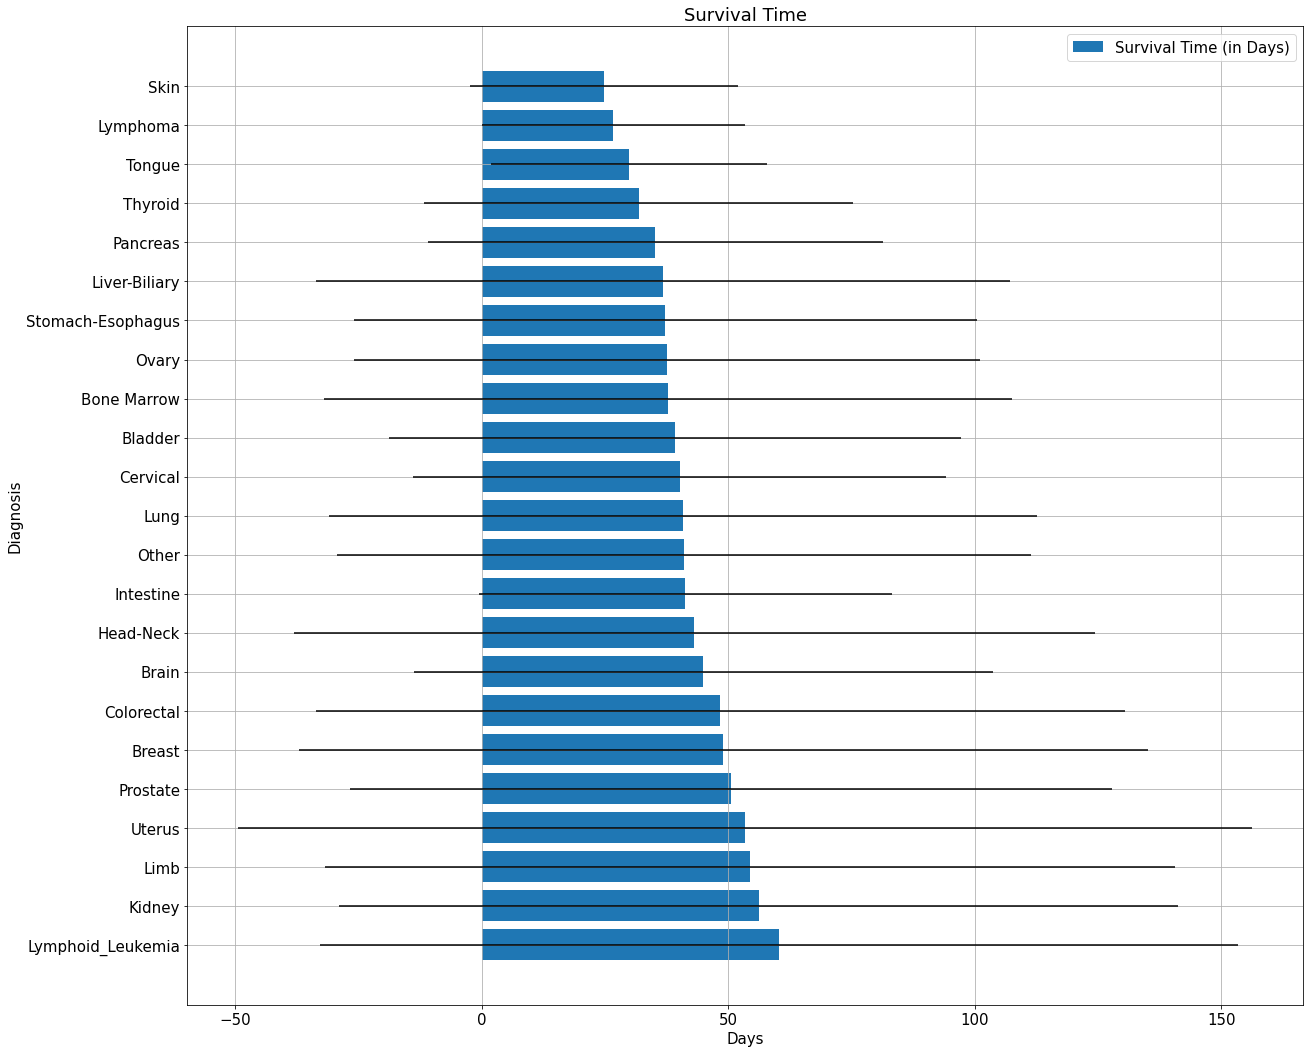

In [136]:
plt.rcParams['figure.figsize'] = [20, 18]
matplotlib.rcParams.update({'font.size': 15})
plt.figure()
labels = df_surv['Diagnosis']
survival = df_surv['survival_time_days']
errors = df_surv['survival_stddev']
fig, ax = plt.subplots()
bar1 = ax.barh(labels, survival, label='Survival Time (in Days)', xerr=errors)
ax.set_xlabel('Days')
ax.set_ylabel('Diagnosis')
ax.set_title('Survival Time')
ax.legend()
plt.grid()
plt.savefig("./graphs/referral analysis/survival_time_diagnosis.png")
plt.show()

<Figure size 720x720 with 0 Axes>

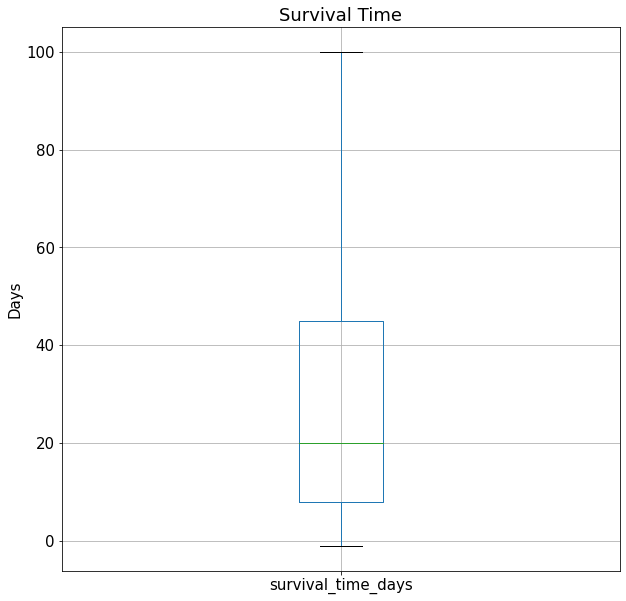

In [137]:
# generate a box and whisker plot
plt.rcParams['figure.figsize'] = [10, 10]
plt.figure()
fig, ax = plt.subplots()
ax.set_ylabel('Days')
ax.set_title('Survival Time')
df_referral.boxplot(column=['survival_time_days'], showfliers=False)

<Figure size 720x720 with 0 Axes>

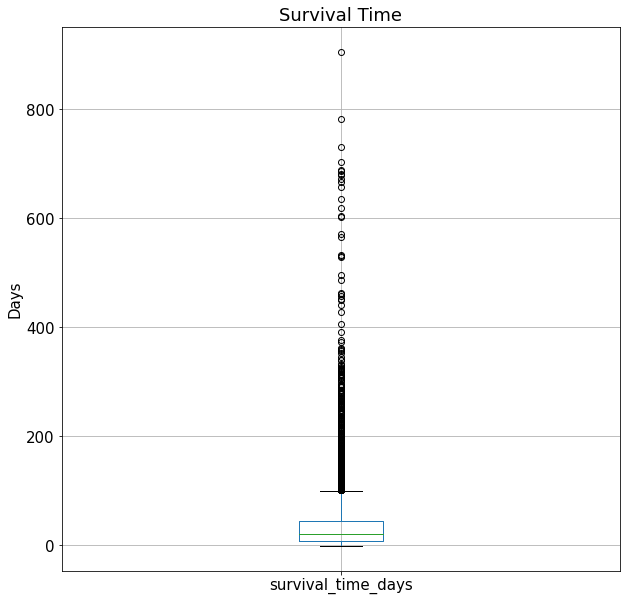

In [138]:
# boxplot with outliers
plt.rcParams['figure.figsize'] = [10, 10]
plt.figure()
fig, ax = plt.subplots()
ax.set_ylabel('Days')
ax.set_title('Survival Time')
df_referral.boxplot(column=['survival_time_days'])

<Figure size 360x360 with 0 Axes>

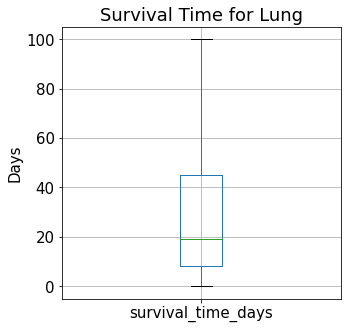

<Figure size 360x360 with 0 Axes>

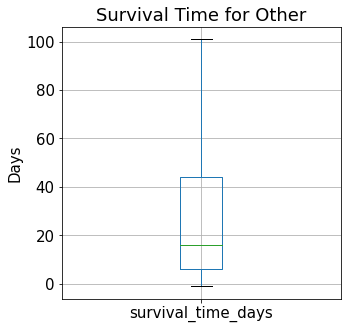

<Figure size 360x360 with 0 Axes>

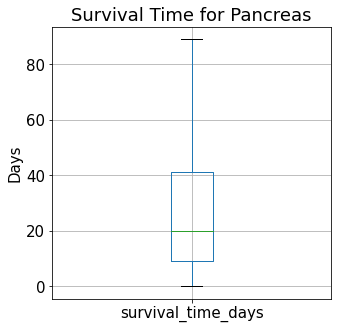

<Figure size 360x360 with 0 Axes>

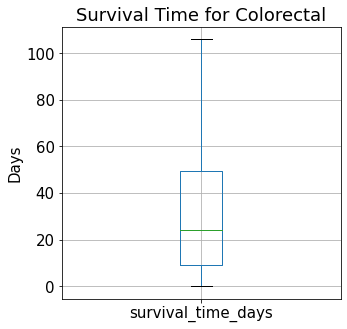

<Figure size 360x360 with 0 Axes>

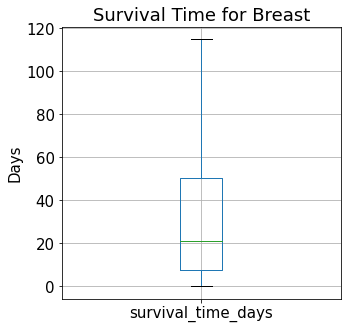

<Figure size 360x360 with 0 Axes>

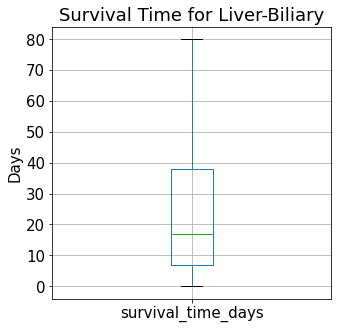

<Figure size 360x360 with 0 Axes>

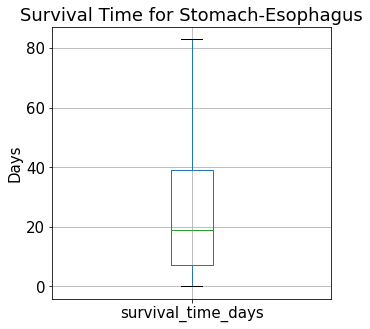

<Figure size 360x360 with 0 Axes>

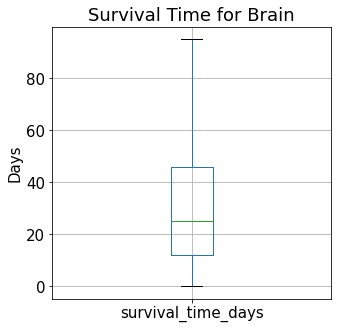

<Figure size 360x360 with 0 Axes>

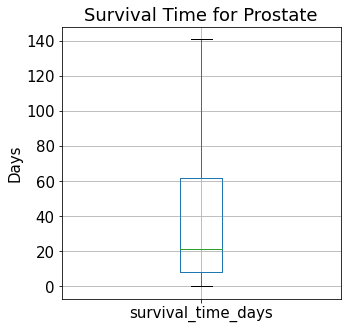

<Figure size 360x360 with 0 Axes>

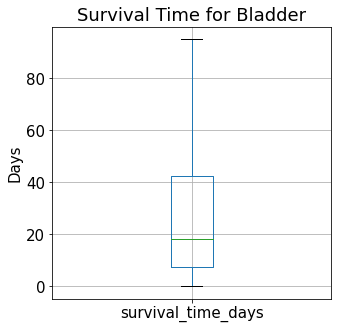

<Figure size 360x360 with 0 Axes>

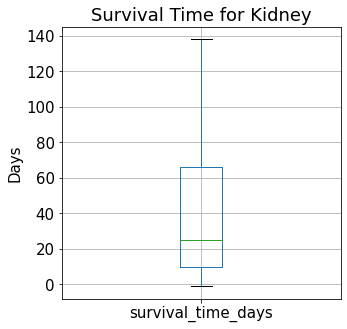

<Figure size 360x360 with 0 Axes>

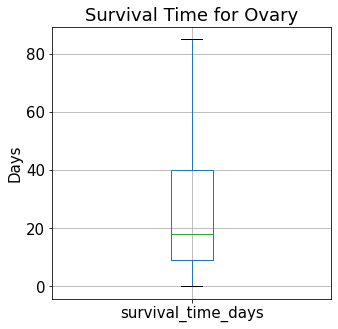

<Figure size 360x360 with 0 Axes>

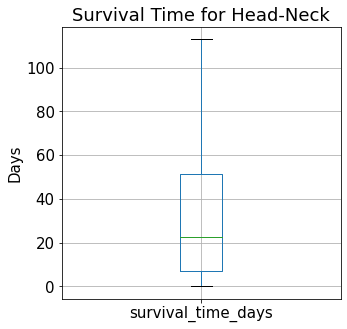

<Figure size 360x360 with 0 Axes>

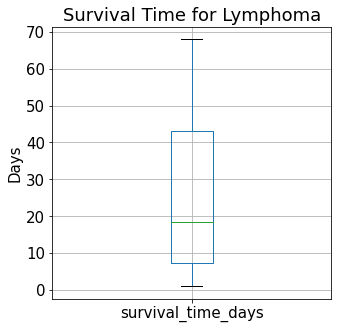

<Figure size 360x360 with 0 Axes>

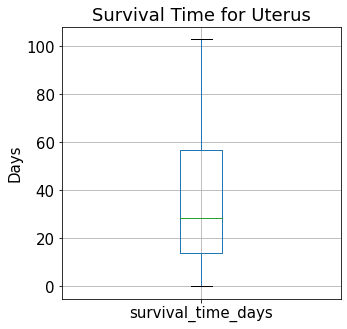

<Figure size 360x360 with 0 Axes>

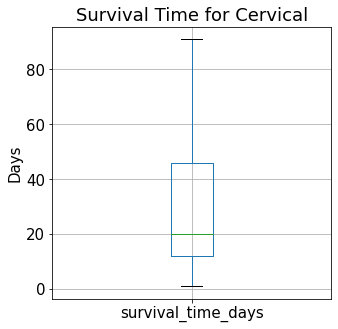

<Figure size 360x360 with 0 Axes>

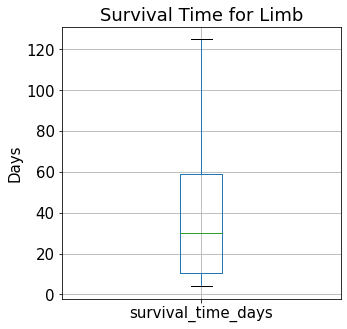

<Figure size 360x360 with 0 Axes>

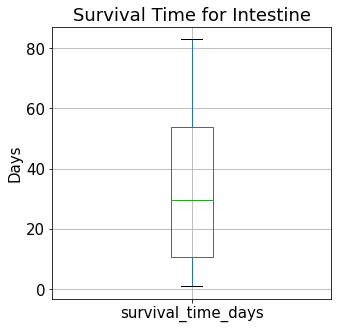

<Figure size 360x360 with 0 Axes>

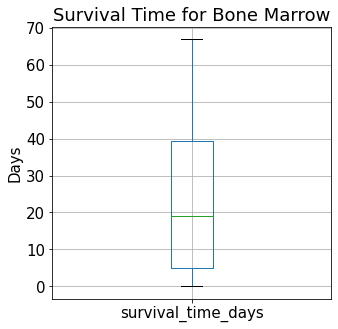

<Figure size 360x360 with 0 Axes>

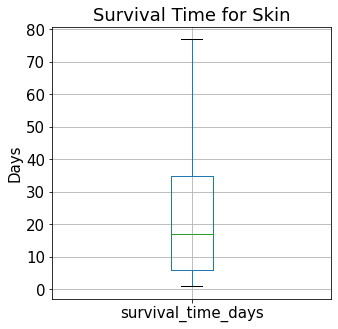

<Figure size 360x360 with 0 Axes>

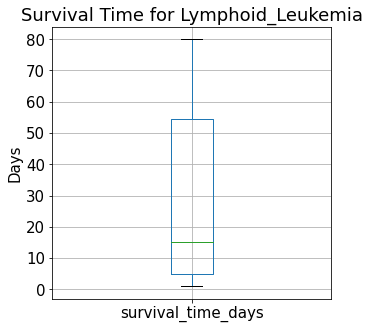

<Figure size 360x360 with 0 Axes>

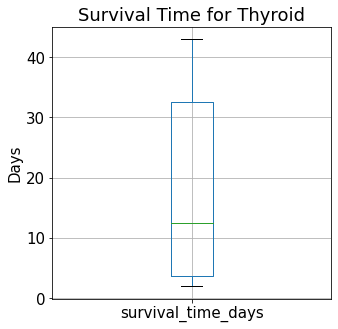

<Figure size 360x360 with 0 Axes>

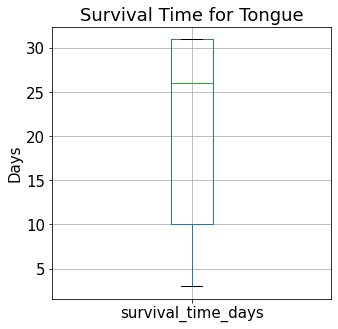

In [139]:
# boxplots for individual cancers
cancers = ['Lung', 'Other', 'Pancreas', 'Colorectal', 'Breast', 'Liver-Biliary',
       'Stomach-Esophagus', 'Brain', 'Prostate', 'Bladder', 'Kidney', 'Ovary',
       'Head-Neck', 'Lymphoma', 'Uterus', 'Cervical', 'Limb', 'Intestine',
       'Bone Marrow', 'Skin', 'Lymphoid_Leukemia', 'Thyroid', 'Tongue']

for cancer in cancers:
    plt.rcParams['figure.figsize'] = [5, 5]
    plt.rcParams.update({'figure.max_open_warning': 0})
    df_temp = df_referral[df_referral['Diagnosis'] == cancer]
    plt.figure()
    fig, ax = plt.subplots()
    ax.set_ylabel('Days')
    ax.set_title('Survival Time for ' + cancer)
    df_temp.boxplot(column=['survival_time_days'], showfliers=False)

In [140]:
# First Definition: Split patients into early/late referral by using the criteria of +- 2 stddev for each diagnosis
